# Analýza datasetu USPS
USPS (United States Postal Service) je dataset obsahujúci ručne písané číslice. Je využívaný pri trénovaní obraz-spracujúcich systémov, pričom jadrom tohto využitia je strojové učenie. Jeho autorom je Jonathan J. Hull-Center of Excellence for Document Analysis and Recognition (CEDAR), Department of Computer Science.
#### <span style="color: blue;">Štruktúra:</span>
Dataset je tvorený trénovacou a testovaciou sadou dát. Trénovacia sada obsahuje 7 291 vzoriek rukou písaných číslic. Testovacia sada naproti tomu obsahuje 2 007 vzoriek rukou písaných číslic.
#### <span style="color: blue;">Formát vzorky:</span>
Vzorky číslic datasetu majú veľkosť 16x16 pixelov a farebný formát grayscale, teda každý pixel vzorky obsahuje hodnotu reprezentujúcu intenzitu svetla.
#### <span style="color: blue;">Pôvod:</span>
Dataset USPS bol vytvorený zo záznamov americkej Poštovej služby, konkrétne z databázy 5 000 názvov miest, 5 000 názvov štátov a 10 000 PSČ.

---
## Importovanie modulov:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tables
import h5py

#príkaz umožnujúci embedded inline kompiláciu modulu matplotlib
%matplotlib inline

---
## Importovanie datasetu:
Na analýzu je potrebné dataset importovať do premennej typu pandas.DataFrame. Dataset je typu .h5 (Hierarchical Data Format). Na zobrazenie hierarchie datasetu je nutné ho inportovať do premennej typu h5py.hl.fles.File. Po oboznámení sa so štruktúrou datasetu je nutné z jednotlivých vrstiev datsetu vyextrahovať samotné dáta a ich označenia.

In [2]:
usps_h5 = h5py.File("/Users/filipeno1/Downloads/Bakalarska_praca/Datasety/USPS/usps.h5", 'r')
print(type(usps_h5))

#zobrazenie podštruktúry momentálnej vrstvy HDF5 pomocou klúčov
print(f"Kľúče usps_h5: {usps_h5.keys()}")

<class 'h5py._hl.files.File'>
Kľúče usps_h5: <KeysViewHDF5 ['test', 'train']>


In [3]:
#extrakcia podštruktúry z predošlej vrstvy HDF5 pomocou klúčov
usps_train_h5 = usps_h5.get("train")
usps_test_h5 = usps_h5.get("test")

#zobrazenie podštruktúry momentálnej vrstvy HDF5 pomocou klúčov
print(f"Kľúče usps_train_h5: {usps_train_h5.keys()}")
print(f"Kľúče usps_test_h5: {usps_test_h5.keys()}")

Kľúče usps_train_h5: <KeysViewHDF5 ['data', 'target']>
Kľúče usps_test_h5: <KeysViewHDF5 ['data', 'target']>


In [4]:
#extrakcia podštruktúry z predošlej vrstvy HDF5 pomocou klúčov
usps_train_data_h5 = usps_train_h5.get("data")
usps_train_label_h5 = usps_train_h5.get("target")

usps_test_data_h5 = usps_test_h5.get("data")
usps_test_label_h5 = usps_test_h5.get("target")

In [5]:
#inicializácia matice dát z HDF5
train_data = np.array(usps_train_data_h5)
test_data = np.array(usps_test_data_h5)

#inicializácia matice informácie o príslušnosti vzorky k číslu 0 až 9 z HDF5
train_target = np.array(usps_train_label_h5)
test_target = np.array(usps_test_label_h5)

---
Na analýzu je potrebné dataset importovať do premennej typu pandas.DataFrame. Do premennej ___usps_train_data_df___ sme importovali trénovaciu a do premennej ___usps_test_data_df___ testovaciu časť datasetu. Do premenných __usps_train_target_df__ a __usps_test_target_df__ sme uložili označenie vzoriek jednotlivých dát.

In [6]:
#inicializácia DataFrame-u z matíc
usps_train_data_df = pd.DataFrame(train_data)
usps_test_data_df = pd.DataFrame(test_data)

usps_train_target_df = pd.DataFrame(train_target)
usps_test_target_df = pd.DataFrame(test_target)

---
## Štruktúra datasetu:
Dataset pozostáva z podmnižín obsahujúcich dáta a z množín obsahujúcich označenie príslušných dát.
<br>Podmnožina dát pozostáva z 256 stĺpcov, pričom každý obsahuje informáciu v diskrétnej kvantitatívnej premennej o jednotlivých pixeloch <0; 1> danej číslice pri rozmere mriežky 16x16px. 
<br>Podmnožina označení pozostáva z 1 stĺpca, ktorý obsahuje informáciu v nominálnej kategorickej premennej, o ktorú číslicu sa jedná <0; 9>.
<br>Štruktúra datasetu je pri jeho trénovacej aj testovacej časti zhodna. Trénovacia časť pozostáva z 7 291 riadkov (vzoriek), testovacia z 2 007 riadkov.

#### <span style="color: blue;">Trénovacie dáta:</span>

In [7]:
usps_train_data_df

,0,1,2,3,4,5,6,7,8,9,...,246,247,248,249,250,251,252,253,254,255
0,0.0,0.0,0.0,0.0000,0.0000,0.0000,0.0000,0.1845,0.9310,0.4165,...,0.6520,0.9115,1.0000,0.7410,0.2630,0.0045,0.0000,0.0000,0.000,0.0
1,0.0,0.0,0.0,0.0935,0.1645,0.0955,0.0565,0.1645,0.0735,0.0000,...,0.1645,0.1645,0.4835,0.8805,0.8810,0.5630,0.4525,0.1645,0.086,0.0
2,0.0,0.0,0.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0020,...,0.0000,0.0000,0.0000,0.4455,1.0000,0.4105,0.0000,0.0000,0.000,0.0
3,0.0,0.0,0.0,0.0000,0.0000,0.3635,0.8420,0.9800,0.7250,0.4665,...,0.3410,1.0000,0.7680,0.0065,0.0000,0.0000,0.0000,0.0000,0.000,0.0
4,0.0,0.0,0.0,0.0000,0.0000,0.0360,0.3980,0.8755,0.7330,0.6170,...,0.7330,0.8195,1.0000,1.0000,0.8955,0.7195,0.4005,0.0585,0.000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7286,0.0,0.0,0.0,0.0060,0.2365,0.3960,0.8100,1.0000,0.7335,0.6980,...,0.4420,0.9495,0.7080,0.2450,0.0000,0.0000,0.0000,0.0000,0.000,0.0
7287,0.0,0.0,0.0,0.0050,0.8540,0.7785,0.6735,0.4465,0.1210,0.0125,...,0.8485,0.8180,0.5835,0.0160,0.0000,0.0000,0.0000,0.0000,0.000,0.0
7288,0.0,0.0,0.0,0.1085,0.0080,0.0865,0.5340,1.0000,1.0000,1.0000,...,0.9025,1.0000,1.0000,0.8635,0.3290,0.0335,0.0000,0.0000,0.000,0.0
7289,0.0,0.0,0.0,0.0000,0.0000,0.2255,0.7315,0.9995,0.9995,0.9995,...,0.3845,0.8105,0.9995,0.4790,0.3845,0.1565,0.0000,0.0000,0.000,0.0


In [8]:
usps_train_target_df

,0
0,6
1,5
2,4
3,7
4,3
...,...
7286,3
7287,3
7288,3
7289,0


#### <span style="color: blue;">Testovacie dáta:</span>

In [9]:
usps_test_data_df

,0,1,2,3,4,5,6,7,8,9,...,246,247,248,249,250,251,252,253,254,255
0,0.0,0.0,0.0,0.0000,0.0000,0.0260,0.2195,0.5740,0.6920,0.9520,...,0.0000,0.0460,0.7150,0.8110,0.0135,0.0000,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.2035,0.8500,1.0000,1.0000,1.0000,1.0000,0.9265,...,1.0000,0.8585,0.6665,0.5810,0.3035,0.0000,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0000,0.0000,0.0000,0.0000,0.0710,0.4470,0.9010,...,0.9505,0.9505,0.9505,0.6450,0.3155,0.0665,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2002,0.0,0.0,0.0,0.0000,0.0000,0.2915,0.9070,1.0000,0.8875,0.1385,...,1.0000,1.0000,0.7770,0.5920,0.2580,0.0000,0.0,0.0,0.0,0.0
2003,0.0,0.0,0.0,0.0000,0.0000,0.0000,0.0725,0.6045,0.9705,0.9045,...,0.0000,0.6595,1.0000,0.5280,0.0000,0.0000,0.0,0.0,0.0,0.0
2004,0.0,0.0,0.0,0.0000,0.4845,0.8760,0.2845,0.0000,0.0000,0.0000,...,1.0000,0.9640,0.3035,0.0000,0.0000,0.0000,0.0,0.0,0.0,0.0
2005,0.0,0.0,0.0,0.0000,0.2330,0.7890,1.0000,0.6505,0.3360,0.0305,...,1.0000,0.7150,0.6000,0.4695,0.0125,0.0000,0.0,0.0,0.0,0.0


In [10]:
usps_test_target_df

,0
0,9
1,6
2,3
3,6
4,6
...,...
2002,3
2003,9
2004,4
2005,0


---
## Vizualizácia vzoriek dát (číslic):
Na vizualizáciu dát využijeme premennú ___train_data___ typu numpy.array.
<br>Do premennej ___img_1___ po preformatovaní na rozmer ___16x16___ uložíme dáta reprezentujúce číslicu.

In [11]:
#uloženie a preformátovanie dát reprezentujúcich prvú číslicu do samostatnej premennej
img_1 = train_data[0].reshape(16, 16)

print(f"Label: {train_target[0]}")
print(img_1)

Label: 6
[[0.         0.         0.         0.         0.         0.
  0.         0.18450001 0.931      0.4165     0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.00400001 0.64849997 1.         0.6535     0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.29500002 1.         0.99300003 0.2175     0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.15849999
  0.9125     1.         0.781      0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.03099999 0.77
  1.         0.889      0.14250001 0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.55       1.
  0.96099997 0.2805     0.         0.         0.         0.
  0.         0.         0.

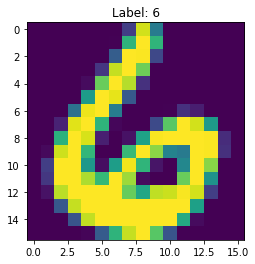

In [12]:
#vizualizácia bez použitia dodatočného filtru
plt.title(f"Label: {train_target[0]}")
plt.imshow(img_1)

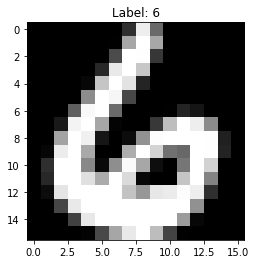

In [13]:
#vizualizácia s použitím čiernobieleho filtra "gray"
plt.title(f"Label: {train_target[0]}")
plt.imshow(img_1, cmap="gray")

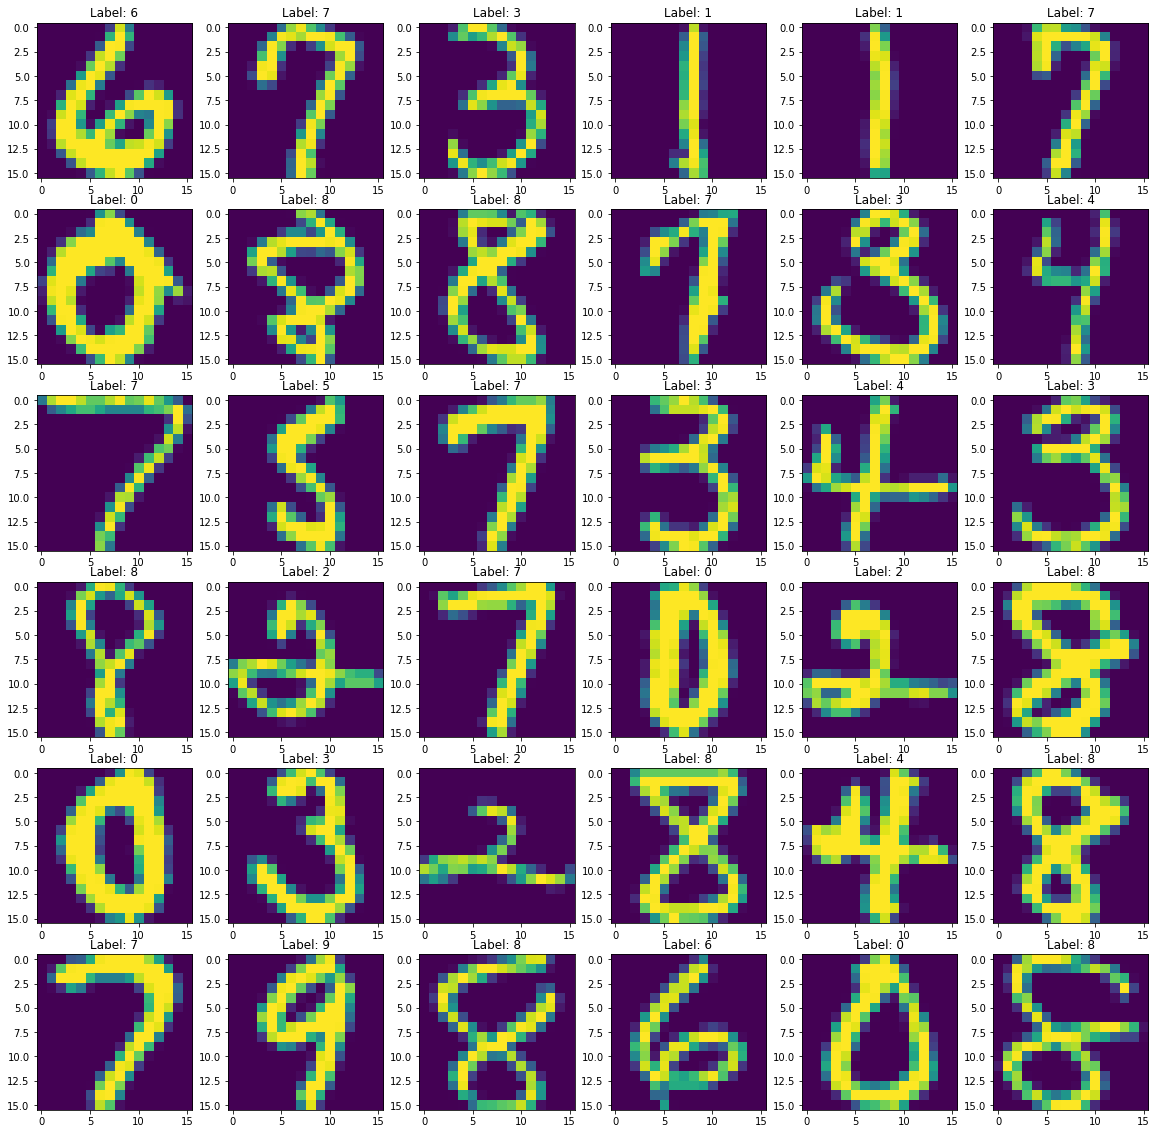

In [14]:
#vizualizácia v mriežke bez použitia dodatočného filtru
f, axarr = plt.subplots(6, 6, figsize=(20,20))
counter = 0

for i in range(0, 6):
    for j in range(0, 6):
        axarr[i, j].set_title(f"Label: {train_target[counter]}")
        axarr[i, j].imshow(train_data[counter].reshape(16, 16))
        counter += 3

---
## Rozbor datasetu:
Pri datasetoch určených na použitie pri strojovom učení je dôležitá ich vhodná robustnosť a škálovanie, ktoré dokážu pri vhodnej optimalizácii daného systému (neurónová sieť...) maximalizovať úspešnosť klasifikácie a minimalizovať trénovaci čas.
<br>Početnosť vzoriek v triedach v datasete USPS je rôzna, pričom nie je zachovaný ani pomer číslic v rovnakých triedach v trénovacej a testovacej sade. Dataset teda nie je vhodne vybalancovaný a je otázne, aký vplyv by táto vlastnosť mala na konečný klasifikačný systém.

#### <span style="color: blue;">Trénovacie dáta:</span>

Text(0.5, 0.98, 'Početnosť vzoriek číslic v trénovacom datasete')

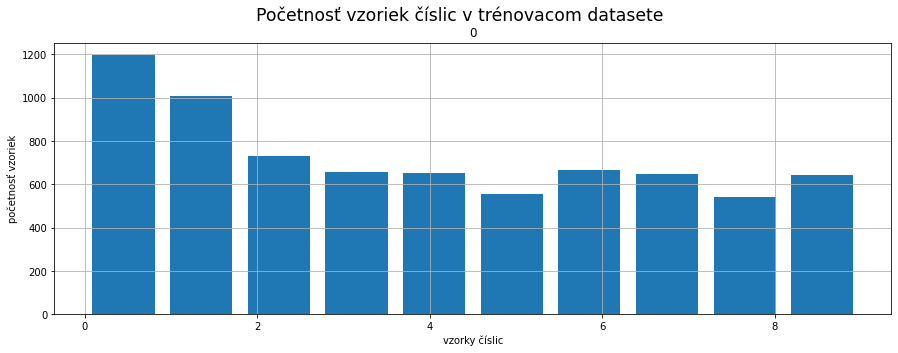

In [15]:
#zobrazenie histogramu zo zvolených údajov (0-tý stĺpec)
usps_train_target_df.hist(figsize=(15, 5), rwidth=0.8)
#nastavenie pomenovania x-ovej osi grafu
plt.xlabel("vzorky číslic")
#nastavenie pomenovania y-ovej osi grafu
plt.ylabel("početnosť vzoriek")
#nastavenie názvu grafu
plt.suptitle("Početnosť vzoriek číslic v trénovacom datasete", ha="center", fontsize="xx-large")

In [16]:
print("Početnosť vzoriek číslic v trénovacom datasete:")
sum_of_count = 0
for i in range(0,10):
    count = usps_train_target_df[usps_train_target_df[0]==i].shape[0]
    sum_of_count += count
    print(f" - počet vzoriek čísla {i}: {count}")
avrg = sum_of_count/(i+1)
print(f"\nPriemerný počet vzoriek: {avrg}")

Početnosť vzoriek číslic v trénovacom datasete:
 - počet vzoriek čísla 0: 1194
 - počet vzoriek čísla 1: 1005
 - počet vzoriek čísla 2: 731
 - počet vzoriek čísla 3: 658
 - počet vzoriek čísla 4: 652
 - počet vzoriek čísla 5: 556
 - počet vzoriek čísla 6: 664
 - počet vzoriek čísla 7: 645
 - počet vzoriek čísla 8: 542
 - počet vzoriek čísla 9: 644

Priemerný počet vzoriek: 729.1


#### <span style="color: blue;">Testovacie dáta:</span>

Text(0.5, 0.98, 'Početnosť vzoriek číslic v testovacom datasete')

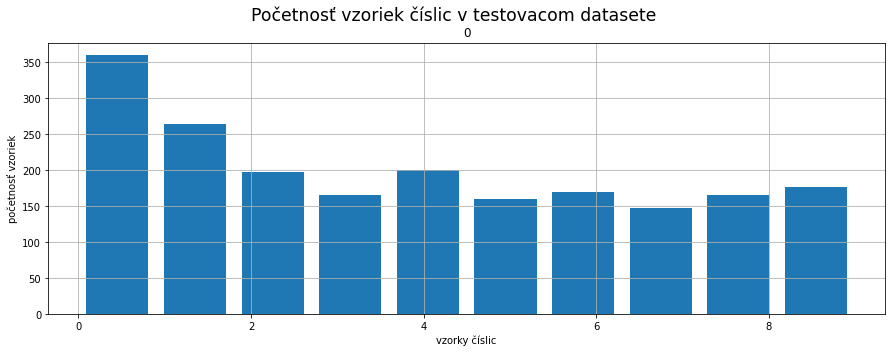

In [17]:
#zobrazenie histogramu zo zvolených údajov (0-tý stĺpec)
usps_test_target_df.hist(figsize=(15, 5), rwidth=0.8)
#nastavenie pomenovania x-ovej osi grafu
plt.xlabel("vzorky číslic")
#nastavenie pomenovania y-ovej osi grafu
plt.ylabel("početnosť vzoriek")
#nastavenie názvu grafu
plt.suptitle("Početnosť vzoriek číslic v testovacom datasete", ha="center", fontsize="xx-large")

In [18]:
print("Početnosť vzoriek číslic v testovacom datasete:")
sum_of_count = 0
for i in range(0,10):
    count = usps_test_target_df[usps_test_target_df[0]==i].shape[0]
    sum_of_count += count
    print(f" - počet vzoriek čísla {i}: {count}")
avrg = sum_of_count/(i+1)
print(f"\nPriemerný počet vzoriek: {avrg}")

Početnosť vzoriek číslic v testovacom datasete:
 - počet vzoriek čísla 0: 359
 - počet vzoriek čísla 1: 264
 - počet vzoriek čísla 2: 198
 - počet vzoriek čísla 3: 166
 - počet vzoriek čísla 4: 200
 - počet vzoriek čísla 5: 160
 - počet vzoriek čísla 6: 170
 - počet vzoriek čísla 7: 147
 - počet vzoriek čísla 8: 166
 - počet vzoriek čísla 9: 177

Priemerný počet vzoriek: 200.7


#### <span style="color: blue;">Pomer trénovacích a testovacích dát:</span>

Text(0.5, 0.98, 'Pomer početnosti vzoriek číslic v trénovacom a testovacom datasete')

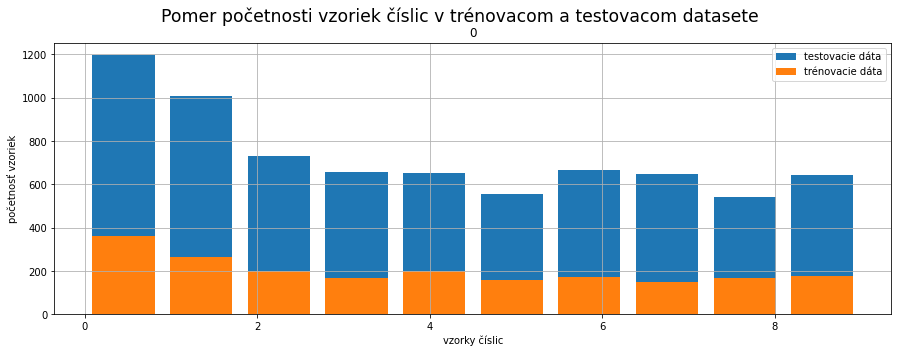

In [19]:
#zobrazenie histogramu zo zvolených údajov (0-tý stĺpec)
ax = usps_train_target_df.hist(figsize=(15, 5), rwidth=0.8)
usps_test_target_df.hist(ax=ax, figsize=(15, 5), rwidth=0.8)
#nastavenie legendy
plt.legend(["testovacie dáta", "trénovacie dáta"])
#nastavenie pomenovania x-ovej osi grafu
plt.xlabel("vzorky číslic")
#nastavenie pomenovania y-ovej osi grafu
plt.ylabel("početnosť vzoriek")
#nastavenie názvu grafu
plt.suptitle("Pomer početnosti vzoriek číslic v trénovacom a testovacom datasete", ha="center", fontsize="xx-large")

In [20]:
print("Pomer početnosti vzoriek číslic v trénovacom a testovacom datasete (trénovacie dáta/testovacie dáta):")
for i in range(0,10):
    train_count = usps_train_target_df[usps_train_target_df[0]==i].shape[0]
    test_count = usps_test_target_df[usps_test_target_df[0]==i].shape[0]
    print(f" - počet vzoriek čísla {i}: {train_count}/{test_count}")

Pomer početnosti vzoriek číslic v trénovacom a testovacom datasete (trénovacie dáta/testovacie dáta):
 - počet vzoriek čísla 0: 1194/359
 - počet vzoriek čísla 1: 1005/264
 - počet vzoriek čísla 2: 731/198
 - počet vzoriek čísla 3: 658/166
 - počet vzoriek čísla 4: 652/200
 - počet vzoriek čísla 5: 556/160
 - počet vzoriek čísla 6: 664/170
 - počet vzoriek čísla 7: 645/147
 - počet vzoriek čísla 8: 542/166
 - počet vzoriek čísla 9: 644/177


---
## Zdroje:

J. J. Hull, "A database for handwritten text recognition research," in IEEE Transactions on Pattern Analysis and Machine Intelligence, vol. 16, no. 5, pp. 550-554, May 1994, doi: 10.1109/34.291440.